In [35]:
#IMPORTING THE LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import random 
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [36]:
#loading the Dataset
X_train = np.loadtxt("C:/Users/NAME/Downloads/Image Classification CNN Keras Dataset-20230823T131907Z-001/Image Classification CNN Keras Dataset/input.csv", delimiter = ',')
Y_train = np.loadtxt("C:/Users/NAME/Downloads/Image Classification CNN Keras Dataset-20230823T131907Z-001/Image Classification CNN Keras Dataset/labels.csv", delimiter = ',')
X_test = np.loadtxt("C:/Users/NAME/Downloads/Image Classification CNN Keras Dataset-20230823T131907Z-001/Image Classification CNN Keras Dataset/input_test.csv", delimiter = ',')
Y_test = np.loadtxt("C:/Users/NAME/Downloads/Image Classification CNN Keras Dataset-20230823T131907Z-001/Image Classification CNN Keras Dataset/labels_test.csv", delimiter = ',')

In [37]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape) 
print("Here training set has 2000 images and each image has 100*100 and has 3 Color channels(Red,Green,Blue) i.e 30000 labels")

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)
Here training set has 2000 images and each image has 100*100 and has 3 Color channels(Red,Green,Blue) i.e 30000 labels


In [38]:
#reshaping the data 
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test), 1)


In [39]:
#Shrinking the data 
X_train = X_train/255.0
X_test = X_test/255.0

In [40]:
print(X_train[1:]) #DATA BETWEEN ) 0 AND 1

[[[[0.51372549 0.50196078 0.52941176]
   [0.62745098 0.61568627 0.64313725]
   [0.77647059 0.75294118 0.8       ]
   ...
   [0.98039216 0.97647059 0.96862745]
   [1.         1.         0.99215686]
   [0.98039216 0.97647059 0.96078431]]

  [[0.54901961 0.5372549  0.56470588]
   [0.49803922 0.48627451 0.51372549]
   [0.47058824 0.44705882 0.48627451]
   ...
   [0.98431373 0.99215686 0.98823529]
   [0.99607843 1.         0.99215686]
   [0.99607843 1.         0.98431373]]

  [[0.8        0.79215686 0.81176471]
   [0.73333333 0.7254902  0.74509804]
   [0.57647059 0.55686275 0.58039216]
   ...
   [0.97647059 1.         1.        ]
   [0.93333333 0.96862745 0.94901961]
   [0.90980392 0.94509804 0.9254902 ]]

  ...

  [[0.68235294 0.71372549 0.76470588]
   [0.6745098  0.70588235 0.75686275]
   [0.69803922 0.72941176 0.77254902]
   ...
   [0.34117647 0.44705882 0.38039216]
   [0.29411765 0.38823529 0.3254902 ]
   [0.31372549 0.41176471 0.3372549 ]]

  [[0.65098039 0.67843137 0.74117647]
   [0.6

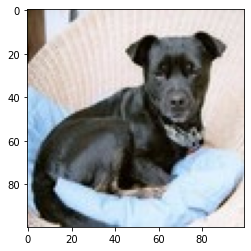

In [79]:
#viewing a random image from the dataset
x = random.randint(0,len(X_train))
plt.imshow(X_train[x,:])
plt.show()

In [46]:
#Training the model
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

In [47]:
#Compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [58]:
#fitting the model
history = model.fit(X_train,Y_train,epochs = 10,batch_size = 64)


Epoch 1/10
32/32 [==============================] - 17s 520ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 2/10
32/32 [==============================] - 16s 511ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 3/10
32/32 [==============================] - 17s 535ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 18s 560ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 14s 431ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 12s 381ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 14s 439ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 8/10
32/32 [==============================] - 13s 402ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 9/10
32/32 [==============================] - 14s 435ms/step - loss: 9.6882e-04 - accuracy: 1.0000
Epoch 10/10
32/32 [==============================] - 12s 382ms/step - loss: 8.8443e-04 

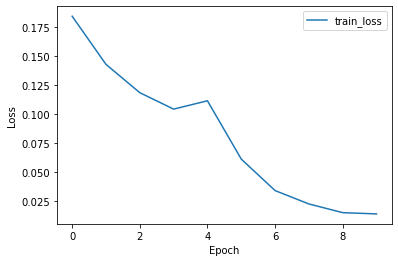

In [54]:
# Plotting the training loss over epochs
plt.plot(history.history['loss'], label='train_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
#Evaluating the model
test_loss ,test_accuracy = model.evaluate(X_test,Y_test)
print(f"Loss is: {test_loss}, accuracy is: {test_accuracy}")

13/13 [==============================] - 1s 57ms/step - loss: 1.6225 - accuracy: 0.7025
Loss is: 1.6225461959838867, accuracy is: 0.7024999856948853


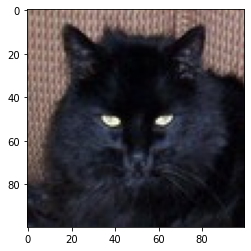

1/1 [==============================] - 0s 31ms/step
[[0.99999326]]


In [77]:
#making a prediction
x2 = random.randint(0,len(X_test))
plt.imshow(X_test[x2, :]) #displaying all the rows (or pixels) along a specific axis while keeping the other axes unchanged.
plt.show()
Y_prediction = model.predict(X_test[x2, :].reshape(1,100,100,3))
print(Y_prediction)

In [78]:
Y_prediction = Y_prediction > 0.5
if(Y_prediction == 0):
        prediction = 'Dog'
else:
        prediction = 'Cat'
print("The model says it is a :" , prediction)
    

The model says it is a : Cat
